# DAY 2: Models - Exercise 4.
RECAP: <br>
1. In Ex-1 We used OBS data to decide wether rainfall was higher or lower than average and assigned it a catagory.
2. in Ex-2 we used hindcasts to compare a old forecasts to an oberved rainfall.
3. in Ex-3 we looked at how ensmbles produce a small range that can when averaged can be better than a single members forecast. 
In this excersice we will be: <br>
1. Accounting for bias in forecasts by removing it to improve the overall forecast.<br>

The data for this excersise is below - this is the same data as Ex-2 and Ex-3 <br>
A forecasted amount of rainfall is given for each year and the months OND. 

**Remember to change the name to your location of intrest.  Example: da = location('Kenya_Hindcast')**

In [1]:
import numpy as np
import xarray as xr
from Data import location
da = location('Kenya_Hindcast')
obs = location('Kenya_Obs_Chirps')

## Climate Mean
In Ex-2 we calculated the climate mean (the mean over the whole data set). <br>
We will repeat that here fore clarity.

In [2]:
ECMWF_Climate_Mean =  da.mean().item()
print("Climate_Mean = ",ECMWF_Climate_Mean, "mm/day")

Climate_Mean =  2.7347777777777775 mm/day


## Bias Correction
Bias is where the forecast is systematically forecasting too high or too low.<br> 
To complete bias correction we need to subtract the climate mean from all the values in the dataset. 

In [3]:
Bias_corrected = da - ECMWF_Climate_Mean
#This cell will have no output

To check thats worked; manually work out what the first years, first members values will be after subtracting the mean. <br>
**To help the next cell will tell you what the mean is as well as the first year, first members value is before subtraction**

In [4]:
print("The mean is:", ECMWF_Climate_Mean)
print("The first year, first member forecast prediction is:", da.isel(year=0, member=0).item(), "mm/day")

The mean is: 2.7347777777777775
The first year, first member forecast prediction is: 2.08 mm/day


**You're value should match the value in the next cell if the Bias Correction worked!**

In [5]:
print(Bias_corrected.isel(year=0, member=0).item())

-0.6547777777777775


So we now have a dataset that is Bias corrected<br>
This gives us the anomaly predicted by the forecast. <br>
This is the same principle as how we calculated the anomaly for the observed rainfall in Ex-1

## Observed anomaly
We will now recall the observed anomaly values as we calculated in Ex-1 <br>
Input Climate_Mean in the same location as EX-1


<details>
  <summary>Click for solution!</summary>
    
X = Climate_Mean
</details>

In [6]:
Climate_Mean = np.mean(obs)
#-edit
X = Climate_Mean
Obs_Anom = [item - X for item in obs]
print(Obs_Anom)


[-0.7083333333333333, 0.7116666666666669, -0.34833333333333316, -0.8483333333333332, 3.4616666666666664, -1.1583333333333332, -0.21833333333333327, -0.29833333333333334, -0.34833333333333316, 0.521666666666667, -0.46833333333333327, -0.08833333333333337, -1.288333333333333, 2.011666666666667, -0.6383333333333332, -0.5883333333333332, 0.18166666666666664, -0.9083333333333332, 1.291666666666667, 0.2516666666666669, -0.31833333333333336, -0.23833333333333329, 0.7016666666666667, -0.6683333333333332]


## Repeating Ideas
We will now do to the Bias corrected data set what we did in Ex-3. <br>
For recap this will:<br>
1. Calculate the minumum and maximum values
2. Calculate the upper and lower quantiles
3. Calcualte the Mean for each year<br>

To save time this has been done for you, just run the cell below. 

In [7]:
#First we create an empty array to store the data in
BC_Yearly_Forecast_mean = []
BC_Yearly_Forecast_min = []
BC_Yearly_Forecast_max = []
BC_Yearly_Forecast_LQ = []
BC_Yearly_Forecast_UQ = []


#Then we need to select for each year all the values accosiated with it
for year in Bias_corrected.year.values:
    data = Bias_corrected.sel(year=year)
    #Now we can repeat the EX-2 needed items
    mean = data.mean().item()
    Max = data.max().item()
    Min = data.min().item()
    LQ = np.percentile(data, 25.00, method = 'closest_observation')
    UQ = np.percentile(data, 75.00, method = 'closest_observation')
    #Now we can store them into the list
    BC_Yearly_Forecast_mean.append(mean)
    BC_Yearly_Forecast_min.append(Min)
    BC_Yearly_Forecast_max.append(Max)
    BC_Yearly_Forecast_LQ.append(LQ)
    BC_Yearly_Forecast_UQ.append(UQ)

## Plotting
We will now plot the bias corrected results the same as we did in Ex-3

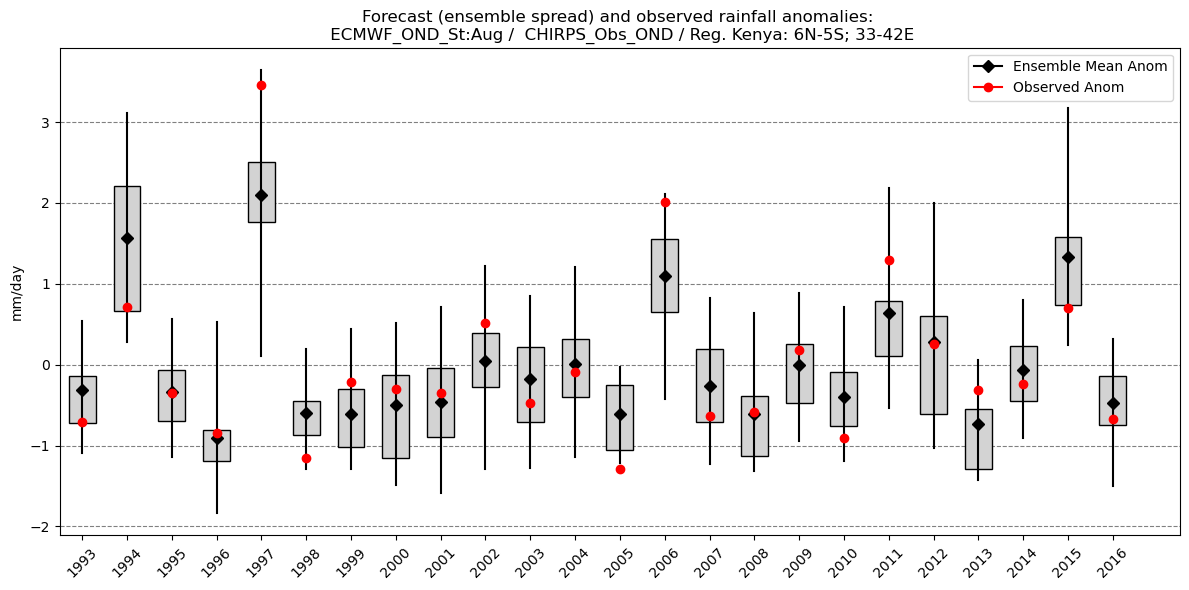

In [8]:
import matplotlib.pyplot as plt
import numpy as np


years = Bias_corrected.year.values
observed = Obs_Anom
ensemble_mean = BC_Yearly_Forecast_mean
min_forecast = BC_Yearly_Forecast_min
max_forecast = BC_Yearly_Forecast_max
lower_quartile = BC_Yearly_Forecast_LQ
upper_quartile = BC_Yearly_Forecast_UQ

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot box plots manually using quartiles and whiskers
for i, year in enumerate(years):
    # Draw the box (IQR) in grey
    ax.add_patch(plt.Rectangle((year - 0.3, lower_quartile[i]), 0.6, upper_quartile[i] - lower_quartile[i],
                               edgecolor='black', facecolor='lightgrey'))
    # Draw the whiskers (range)
    ax.plot([year, year], [min_forecast[i], max_forecast[i]], color='black')
    # Draw the ensemble mean as a black diamond (mean value)
    ax.plot(year, ensemble_mean[i], marker='D', color='black', label='Ensemble Mean Anom' if i == 0 else "")
    # Draw the observed value as a black circle (Obs_rain)
    ax.plot(year, observed[i], marker='o', color='red', label='Observed Anom' if i == 0 else "")


ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.set_ylabel('mm/day')
ax.set_title('Forecast (ensemble spread) and observed rainfall anomalies: \n ECMWF_OND_St:Aug /  CHIRPS_Obs_OND / Reg. Kenya: 6N-5S; 33-42E' )
ax.set_xlim([1992.5, 2017.5])
#~ax.set_ylim([-2, 4])
ax.legend()

plt.tight_layout()
plt.show()


## Capture Rate
We now can work out how many of the observed rainfall anomalies fit into the forecasted anomlies range for each year.<br>
This is the capture rate.<br>
<br>
This can be manually counted on this graph above.<br>
But in overwhelming data sets it must be auto-calculated.

In [9]:
#This equation below converts the Array to be able to be used in numpy function ">"
Obs_A = np.array(Obs_Anom)


# To know the capture rate we must find out if OBS anom falls between the forecasted Min and Max values for that year
# To do this we will assign it a 2 value if it falls outside and a 1 value if it falls within the boundary.
Obs_A[Obs_A>BC_Yearly_Forecast_max]= 2
Obs_A[Obs_A<BC_Yearly_Forecast_min]= 2
Obs_A[(Obs_A<BC_Yearly_Forecast_max)&(Obs_A>BC_Yearly_Forecast_min)]= 1
Obs_A_Catagories = Obs_A

print("This is the Catagories each RNA value falls into:",Obs_A_Catagories)

This is the Catagories each RNA value falls into: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


we can now count how many 1's there are <br>
Each 1 will be a 'hit' 



In [29]:

count = np.count_nonzero(Obs_A_Catagories == 1)
print("In this data there are", count, "out of", da['year'].size, "hits")


In this data there are 22 out of 24 hits


# You have now finished EX 4; Please refer to the powerpoint on what to do next. 
## Copy the image of the plot into the powerpoint 